In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/ML_project/images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

/content/drive/MyDrive/ML_project/images/maksssksksss427.png
/content/drive/MyDrive/ML_project/images/maksssksksss452.png
/content/drive/MyDrive/ML_project/images/maksssksksss459.png
/content/drive/MyDrive/ML_project/images/maksssksksss45.png
/content/drive/MyDrive/ML_project/images/maksssksksss445.png
/content/drive/MyDrive/ML_project/images/maksssksksss424.png
/content/drive/MyDrive/ML_project/images/maksssksksss435.png
/content/drive/MyDrive/ML_project/images/maksssksksss431.png
/content/drive/MyDrive/ML_project/images/maksssksksss432.png
/content/drive/MyDrive/ML_project/images/maksssksksss433.png
/content/drive/MyDrive/ML_project/images/maksssksksss469.png
/content/drive/MyDrive/ML_project/images/maksssksksss501.png
/content/drive/MyDrive/ML_project/images/maksssksksss484.png
/content/drive/MyDrive/ML_project/images/maksssksksss48.png
/content/drive/MyDrive/ML_project/images/maksssksksss490.png
/content/drive/MyDrive/ML_project/images/maksssksksss479.png
/content/drive/MyDrive/ML_

In [2]:
import xml.etree.ElementTree as et
import re
import pandas as pd

dic = {"image": [],"Dimensions": []}
for i in range(1,116):
	dic[f'Object {i}']=[]
print("Generating data in CSV format....")

# Parsing XML file inside annotation folder into tree structure 

for file in os.listdir("/content/drive/MyDrive/ML_project/annotations"):
    row = []
    xml = et.parse("/content/drive/MyDrive/ML_project/annotations/"+file) 
    root = xml.getroot()
    img = root[1].text
    row.append(img)
    h,w = root[2][0].text,root[2][1].text
    row.append([h,w])

    for i in range(4,len(root)):
        temp = []
        temp.append(root[i][0].text)
        for point in root[i][5]:
            temp.append(point.text)
        row.append(temp)
    for i in range(len(row),119):
        row.append(0)
    for i,each in enumerate(dic):
        dic[each].append(row[i])
df = pd.DataFrame(dic)

Generating data in CSV format....


In [3]:
df.head()


,image,Dimensions,Object 1,Object 2,Object 3,Object 4,Object 5,Object 6,Object 7,Object 8,Object 9,Object 10,Object 11,Object 12,Object 13,Object 14,Object 15,Object 16,Object 17,Object 18,Object 19,Object 20,Object 21,Object 22,Object 23,Object 24,Object 25,Object 26,Object 27,Object 28,Object 29,Object 30,Object 31,Object 32,Object 33,Object 34,Object 35,Object 36,Object 37,Object 38,...,Object 76,Object 77,Object 78,Object 79,Object 80,Object 81,Object 82,Object 83,Object 84,Object 85,Object 86,Object 87,Object 88,Object 89,Object 90,Object 91,Object 92,Object 93,Object 94,Object 95,Object 96,Object 97,Object 98,Object 99,Object 100,Object 101,Object 102,Object 103,Object 104,Object 105,Object 106,Object 107,Object 108,Object 109,Object 110,Object 111,Object 112,Object 113,Object 114,Object 115
0,maksssksksss17.png,"[301, 400]","[with_mask, 73, 179, 169, 297]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,maksssksksss378.png,"[400, 188]","[with_mask, 112, 90, 158, 132]","[with_mask, 237, 61, 285, 103]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,maksssksksss96.png,"[400, 280]","[with_mask, 102, 97, 140, 135]","[without_mask, 64, 151, 110, 201]","[without_mask, 251, 88, 282, 124]","[with_mask, 296, 153, 335, 195]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,maksssksksss735.png,"[400, 225]","[with_mask, 3, 29, 49, 79]","[with_mask, 121, 68, 152, 103]","[with_mask, 164, 40, 178, 60]","[with_mask, 195, 39, 222, 70]","[with_mask, 352, 52, 367, 68]","[without_mask, 379, 54, 392, 71]","[without_mask, 305, 46, 322, 65]","[without_mask, 281, 44, 296, 63]","[without_mask, 249, 42, 266, 67]","[without_mask, 75, 47, 97, 69]","[without_mask, 58, 51, 68, 62]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,maksssksksss191.png,"[400, 301]","[with_mask, 221, 82, 297, 163]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pandas as pd
import glob
import os
import cv2
import random as rand
image_directories = sorted(glob.glob(os.path.join("/content/drive/MyDrive/ML_project/images","*.png")))
j=0
classes = ["without_mask","mask_weared_incorrect","with_mask"]
labels = []
data = []

print("Extracting each data into respective label folders....")
for idx,image in enumerate(image_directories):
    img  = cv2.imread(image)
   
    #scale to dimension
    X,Y = df["Dimensions"][idx]
    cv2.resize(img,(int(X),int(Y)))
   
    #find the face in each object
    for obj in df.columns[3:]:
        info = df[obj][idx]
        if info!=0:
            label = info[0]
            info[0] = info[0].replace(str(label), str(classes.index(label)))
            info=[int(each) for each in info]
            face = img[info[2]:info[4],info[1]:info[3]]
            if((info[3]-info[1])>40 and (info[4]-info[2])>40):
                try:
                    face = cv2.resize(face, (224, 224))
                    face = img_to_array(face)
                    face = preprocess_input(face)
                    data.append(face)
                    labels.append(label)
                    if(label=="mask_weared_incorrect"):
                        data.append(face)
                        labels.append(label)

                except:
                    pass


                
print("Done!")



Extracting each data into respective label folders....
Done!


In [5]:
data = np.array(data, dtype="float32")
labels = np.array(labels)
labels

array(['with_mask', 'without_mask', 'with_mask', 'with_mask', 'with_mask',
       'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
       'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
       'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
       'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
       'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
       'without_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
       'without_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
       'with_mask', 'without_mask', 'with_mask', 'mask_weared_incorrect',
       'mask_weared_incorrect', 'with_mask', 'without_mask', 'with_mask',
       'without_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
       'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
       'without_mask', 'with_mask', 'without_mask', 'without_mask',
       'without_mask', 'with_mask', 'without_mask', 

In [6]:
lb = LabelEncoder()
# converting labels to machine readable form/ one hot encoding
labels = lb.fit_transform(labels)
#converting labels into categorical form ex [1,0][1,1][0,1]
labels = to_categorical(labels)

In [7]:
#constructs the training data generator for data augmentation
aug = ImageDataGenerator(
    zoom_range=0.1,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
    )

In [32]:
INIT_LR = 1e-4
EPOCHS = 25
BS = 1
len(data)

336

In [33]:
#Load the MobileNetV2 network ensuring the head FC layer sets are left off 
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [34]:
#splitting dataset for testing and training
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.3, stratify=labels, random_state=42)

In [35]:
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] compiling model...
[INFO] training head...
Epoch 1/25
235/235 [==============================] - 23s 99ms/step - loss: 0.7801 - accuracy: 0.7447 - val_loss: 0.7387 - val_accuracy: 0.8218
Epoch 2/25
235/235 [==============================] - 23s 99ms/step - loss: 0.7361 - accuracy: 0.8043 - val_loss: 0.6523 - val_accuracy: 0.8218
Epoch 3/25
235/235 [==============================] - 22s 95ms/step - loss: 0.5775 - accuracy: 0.8085 - val_loss: 0.6589 - val_accuracy: 0.8218
Epoch 4/25
235/235 [==============================] - 23s 96ms/step - loss: 0.6145 - accuracy: 0.8085 - val_loss: 0.6604 - val_accuracy: 0.8218
Epoch 5/25
235/235 [==============================] - 22s 96ms/step - loss: 0.5398 - accuracy: 0.8298 - val_loss: 0.6655 - val_accuracy: 0.8218
Epoch 6/25
235/235 [==============================] - 22s 96ms/step - loss: 0.5219 - accuracy: 0.8383 - val_loss: 0.6525 - val_accuracy: 0.8218
Epoch 7/25
235/235 [==============================] - 22s 96ms/step - loss: 0.5030 - a

                       precision    recall  f1-score   support

mask_weared_incorrect       1.00      0.14      0.25         7
            with_mask       0.83      0.99      0.90        83
         without_mask       0.00      0.00      0.00        11

             accuracy                           0.82       101
            macro avg       0.61      0.38      0.38       101
         weighted avg       0.75      0.82      0.76       101


 saving mask detector model...



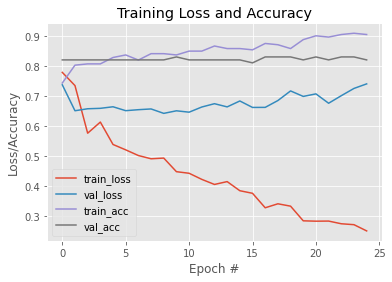

In [36]:

predIdxs = model.predict(testX, batch_size=1)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

# serialize the model to disk
print("\n saving mask detector model...\n")
model.save("mask_detector.model", save_format="h5")


# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()